In [ ]:
#https://maartengr.github.io/BERTopic/faq.html
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
%%capture
!pip install bertopic

In [ ]:
import pandas as pd
import numpy as np
#from bertopic import BERTopic
#from umap import UMAP

In [ ]:
import nltk
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
docs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dissertation/LinkedinSentencesData.xlsx').reset_index(drop=True)
#,sep=";", encoding='cp1252',on_bad_lines='skip')
docs

Unnamed: 0       Date  \
0              0 2023-09-13   
1              1 2023-09-13   
2              2 2023-09-13   
3              3 2023-09-13   
4              4 2023-09-13   
...          ...        ...   
1501        1501 2022-03-28   
1502        1502 2022-03-28   
1503        1503 2022-03-28   
1504        1504 2022-03-28   
1505        1505 2022-03-28   

                                                  Topic  \
0     5 things businesses should consider now for su...   
1     5 things businesses should consider now for su...   
2     5 things businesses should consider now for su...   
3     5 things businesses should consider now for su...   
4     5 things businesses should consider now for su...   
...                                                 ...   
1501      CDP reporting in 2022 – what you need to know   
1502      CDP reporting in 2022 – what you need to know   
1503      CDP reporting in 2022 – what you need to know   
1504      CDP reporting in 2022 – what you need to know   
1505      CDP reporting in 2022 – what you need to know   

                                                Context  sentNum  Unnamed: 5  
0     SBTi recently published its fourth report titl...        3         3.0  
1     Greenstone has curated an article that capture...        1         1.0  
2     Established in 2014, The Science Based Targets...        3         4.0  
3     SBTi prioritises emission reduction, offering ...        4         4.0  
4     "SBTi Monitoring Report 2022 - Looking back at...        1         1.0  
...                                                 ...      ...         ...  
1501  CDP’s disclosure platform provides the mechani...        3         3.0  
1502  Greenstone is a Gold Accredited CDP software p...        3         3.0  
1503        Using Greenstone’s software companies can:         1         NaN  
1504  Define bespoke question sets from a range of r...        1         NaN  
1505  As well to software, Greenstone provides its c...        2         2.0  

[1506 rows x 6 columns]

In [ ]:
x=docs['Context']
x

0       SBTi recently published its fourth report titl...
1       Greenstone has curated an article that capture...
2       Established in 2014, The Science Based Targets...
3       SBTi prioritises emission reduction, offering ...
4       "SBTi Monitoring Report 2022 - Looking back at...
                              ...                        
1501    CDP’s disclosure platform provides the mechani...
1502    Greenstone is a Gold Accredited CDP software p...
1503          Using Greenstone’s software companies can: 
1504    Define bespoke question sets from a range of r...
1505    As well to software, Greenstone provides its c...
Name: Context, Length: 1506, dtype: object

In [ ]:
newsletterList=[]
for i in range(len(x)):
  print(i)
  newsletterList.append(docs['Context'][i])
newsletterList

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

['SBTi recently published its fourth report titled "SBTi Monitoring Report 2022 - Looking back at 2022 and moving forward to 2023 and beyond". This comprehensive report delves into the worldwide advancements of science-based targets and reveals a remarkable ongoing surge in the adoption of science-targets by companies and financial institutions. This trend persists despite the escalating challenges prevalent on the global stage.  ',
 'Greenstone has curated an article that captures the key insights from this report.  ',
 'Established in 2014, The Science Based Targets Initiative (SBTi) is a collaboration among organisations including CDP, United Nations Global Compact, World Resources Institute (WRI), World Wide Fund for Nature (WWF), and the We Mean Business Coalition. It assists global companies and financial institutions in setting science-based GHG emissions reduction targets, striving for ambitious corporate climate action. The SBTi mission involves aligning businesses with climat

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt_tab')

# Download the NLTK sentence tokenizer data
nltk.download('punkt')

def get_sentences(paragraph):
    # Tokenize the paragraph into sentences
    sentences = sent_tokenize(paragraph)
    return sentences

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
test=docs[['Date','Topic','Context']]

In [ ]:
print(get_sentences(test['Context'][0]))
len(get_sentences(test['Context'][0]))

['SBTi recently published its fourth report titled "SBTi Monitoring Report 2022 - Looking back at 2022 and moving forward to 2023 and beyond".', 'This comprehensive report delves into the worldwide advancements of science-based targets and reveals a remarkable ongoing surge in the adoption of science-targets by companies and financial institutions.', 'This trend persists despite the escalating challenges prevalent on the global stage.']


3

In [ ]:
test['sentNumLAST']=''
test.head()

<ipython-input-11-bdb378fadce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST']=''


Date                                              Topic  \
0 2023-09-13  5 things businesses should consider now for su...   
1 2023-09-13  5 things businesses should consider now for su...   
2 2023-09-13  5 things businesses should consider now for su...   
3 2023-09-13  5 things businesses should consider now for su...   
4 2023-09-13  5 things businesses should consider now for su...   

                                             Context sentNumLAST  
0  SBTi recently published its fourth report titl...              
1  Greenstone has curated an article that capture...              
2  Established in 2014, The Science Based Targets...              
3  SBTi prioritises emission reduction, offering ...              
4  "SBTi Monitoring Report 2022 - Looking back at...

In [ ]:
for i in range(len(test['Context'])):
  print(len(get_sentences(test['Context'][0])))
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
test

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps u

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps u

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-input-13-ff5393f2b3f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentNumLAST'][i]=len(get_sentences(test['Context'][i]))
<ipython-i

Date                                              Topic  \
0    2023-09-13  5 things businesses should consider now for su...   
1    2023-09-13  5 things businesses should consider now for su...   
2    2023-09-13  5 things businesses should consider now for su...   
3    2023-09-13  5 things businesses should consider now for su...   
4    2023-09-13  5 things businesses should consider now for su...   
...         ...                                                ...   
1501 2022-03-28      CDP reporting in 2022 – what you need to know   
1502 2022-03-28      CDP reporting in 2022 – what you need to know   
1503 2022-03-28      CDP reporting in 2022 – what you need to know   
1504 2022-03-28      CDP reporting in 2022 – what you need to know   
1505 2022-03-28      CDP reporting in 2022 – what you need to know   

                                                Context sentNumLAST  
0     SBTi recently published its fourth report titl...           3  
1     Greenstone has curated an article that capture...           1  
2     Established in 2014, The Science Based Targets...           3  
3     SBTi prioritises emission reduction, offering ...           4  
4     "SBTi Monitoring Report 2022 - Looking back at...           1  
...                                                 ...         ...  
1501  CDP’s disclosure platform provides the mechani...           3  
1502  Greenstone is a Gold Accredited CDP software p...           3  
1503        Using Greenstone’s software companies can:            1  
1504  Define bespoke question sets from a range of r...           1  
1505  As well to software, Greenstone provides its c...           2  

[1506 rows x 4 columns]

In [ ]:
test

Date                                              Topic  \
0    2023-09-13  5 things businesses should consider now for su...   
1    2023-09-13  5 things businesses should consider now for su...   
2    2023-09-13  5 things businesses should consider now for su...   
3    2023-09-13  5 things businesses should consider now for su...   
4    2023-09-13  5 things businesses should consider now for su...   
...         ...                                                ...   
1501 2022-03-28      CDP reporting in 2022 – what you need to know   
1502 2022-03-28      CDP reporting in 2022 – what you need to know   
1503 2022-03-28      CDP reporting in 2022 – what you need to know   
1504 2022-03-28      CDP reporting in 2022 – what you need to know   
1505 2022-03-28      CDP reporting in 2022 – what you need to know   

                                                Context sentNumLAST  
0     SBTi recently published its fourth report titl...           3  
1     Greenstone has curated an article that capture...           1  
2     Established in 2014, The Science Based Targets...           3  
3     SBTi prioritises emission reduction, offering ...           4  
4     "SBTi Monitoring Report 2022 - Looking back at...           1  
...                                                 ...         ...  
1501  CDP’s disclosure platform provides the mechani...           3  
1502  Greenstone is a Gold Accredited CDP software p...           3  
1503        Using Greenstone’s software companies can:            1  
1504  Define bespoke question sets from a range of r...           1  
1505  As well to software, Greenstone provides its c...           2  

[1506 rows x 4 columns]

In [ ]:
test.to_excel('/content/drive/MyDrive/Colab Notebooks/Dissertation/LinkedinSentencesData.xlsx')

In [ ]:
sentences=get_sentences(str(newsletterList))
sentences

['[\'SBTi recently published its fourth report titled "SBTi Monitoring Report 2022 - Looking back at 2022 and moving forward to 2023 and beyond".',
 'This comprehensive report delves into the worldwide advancements of science-based targets and reveals a remarkable ongoing surge in the adoption of science-targets by companies and financial institutions.',
 'This trend persists despite the escalating challenges prevalent on the global stage.',
 "', 'Greenstone has curated an article that captures the key insights from this report.",
 "', 'Established in 2014, The Science Based Targets Initiative (SBTi) is a collaboration among organisations including CDP, United Nations Global Compact, World Resources Institute (WRI), World Wide Fund for Nature (WWF), and the We Mean Business Coalition.",
 'It assists global companies and financial institutions in setting science-based GHG emissions reduction targets, striving for ambitious corporate climate action.',
 'The SBTi mission involves aligning

In [ ]:
len(sentences)

2457

In [ ]:
#vectorizers
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec_tfidf = TfidfVectorizer(ngram_range=(2, 3), stop_words="english")
vectorizer_model = CountVectorizer(ngram_range=(2,3),stop_words="english")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize, sent_tokenize
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
import nltk
nltk.download('punkt_tab')



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Preprocess documents (tokenize and clean)
preprocessed_documents = [word_tokenize(doc.lower()) for doc in sentences]

# Create a gensim dictionary from the preprocessed documents
dictionary = Dictionary(preprocessed_documents)

vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
#from bertopic import BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(sentences)

2024-12-24 14:23:42,947 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/77 [00:00<?, ?it/s]

2024-12-24 14:24:56,269 - BERTopic - Embedding - Completed ✓
2024-12-24 14:24:56,271 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-24 14:25:20,506 - BERTopic - Dimensionality - Completed ✓
2024-12-24 14:25:20,509 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-24 14:25:21,385 - BERTopic - Cluster - Completed ✓
2024-12-24 14:25:21,398 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-24 14:25:21,685 - BERTopic - Representation - Completed ✓


In [ ]:
#models
#topic_model_ng = BERTopic(language="english",n_gram_range=(2,3) ,calculate_probabilities=True, verbose=True)
#topic_model_umap = BERTopic(umap_model=umap_model,nr_topics="auto")
#topic_model_vec = BERTopic(vectorizer_model=vectorizer_model,nr_topics="auto")
topic_model_tfidf = BERTopic(umap_model=umap_model, vectorizer_model=vec_tfidf, nr_topics="auto")

#topic_model_umap_ng = BERTopic(n_gram_range=(2, 3),umap_model=umap_model,nr_topics="auto")

#fit doc to model

#topics_ng, probs_ng = topic_model_ng.fit_transform(sentences)
topics_tfidf, probs_tfidf = topic_model_tfidf.fit_transform(sentences)
#topics_umap, probs_umap = topic_model_umap.fit_transform(sentences)
#topics_vec, probs_vec = topic_model_vec.fit_transform(sentences)
#topics_umap_ng, probs_umap_ng = topic_model_umap_ng.fit_transform(sentences)

In [ ]:
freq = topic_model_tfidf.get_topic_info();
#freq.to_excel('/content/drive/MyDrive/Colab Notebooks/Dissertation/Results/LinkedinSentences/Result_BertLinkedIn_umap_ng_tfidf_sentence.xlsx')
freq.head()


Topic  Count                                               Name  \
0     -1    788  -1_supply chain_esg data_environmental social_...   
1      0    424  0_esg software_sustainability reporting_esg da...   
2      1    211  1_scope emissions_scope scope_scope reporting_...   
3      2    178  2_supply chain_supply chains_supplier data_sup...   
4      3     52  3_sasb standards_standards board_sustainabilit...   

                                      Representation  \
0  [supply chain, esg data, environmental social,...   
1  [esg software, sustainability reporting, esg d...   
2  [scope emissions, scope scope, scope reporting...   
3  [supply chain, supply chains, supplier data, s...   
4  [sasb standards, standards board, sustainabili...   

                                 Representative_Docs  
0  [Manual processes are not only a security risk...  
1  [', 'Using Greenstone’s software, companies ca...  
2  [As scope 3 emissions are the result of activi...  
3  [', 'It’s an opportunity for you to complete a...  
4  [", 'The International Sustainability Standard...

In [ ]:
topic_model_tfidf.generate_topic_labels()

['-1_supply chain_esg data_environmental social',
 '0_esg software_sustainability reporting_esg data',
 '1_scope emissions_scope scope_scope reporting',
 '2_supply chain_supply chains_supplier data',
 '3_sasb standards_standards board_sustainability disclosure',
 '4_biodiversity loss_ecosystem services_tnfd framework',
 '5_ghg protocol_ghg emissions_emissions ghg protocol',
 '6_gri standards_sustainability report_principle emphasises importance',
 '7_climaterelated financial_tcfd recommendations_climaterelated financial disclosures',
 '8_good governance_ethical behaviour_trust stakeholders',
 '9_deadlines flags notifications_sending questionnaires_address expired',
 '10_accelerated filers_sec reporting_proposed sec',
 '11_climate change_effects climate change_effects climate',
 '12_transparency organisations_inclusion deampi_equity inclusion deampi',
 '13_targets initiative sbti_initiative sbti_targets initiative',
 '14_organisations need_risk management_risk management guest',
 '15_us

In [ ]:
#topic_model.visualize_barchart(top_n_topics=10, n_words=7)
#topic_model_ng.visualize_barchart(top_n_topics=10, n_words=7)
#topic_model_umap.visualize_barchart(top_n_topics=10, n_words=7)
#topic_model_umap_ng.visualize_barchart(top_n_topics=10, n_words=7)
#topic_model_tfidf.visualize_barchart(top_n_topics=10, n_words=7)
topic_model_tfidf.visualize_barchart(top_n_topics=10, n_words=7)

In [ ]:
topic_model_tfidf.find_topics("linkedin")

([33, 23, 9, 29, 22],
 [0.2559674539776574,
  0.24804439481485085,
  0.19539088917043812,
  0.1938038248526223,
  0.1895439513883364])

In [ ]:
topic_model_tfidf.visualize_distribution(probs_tfidf)

In [ ]:
topic_model_tfidf.visualize_heatmap(n_clusters=2, width=1000, height=1000)

In [ ]:
topic_model_tfidf.visualize_hierarchy()

In [ ]:
!pip install --upgrade bertopic

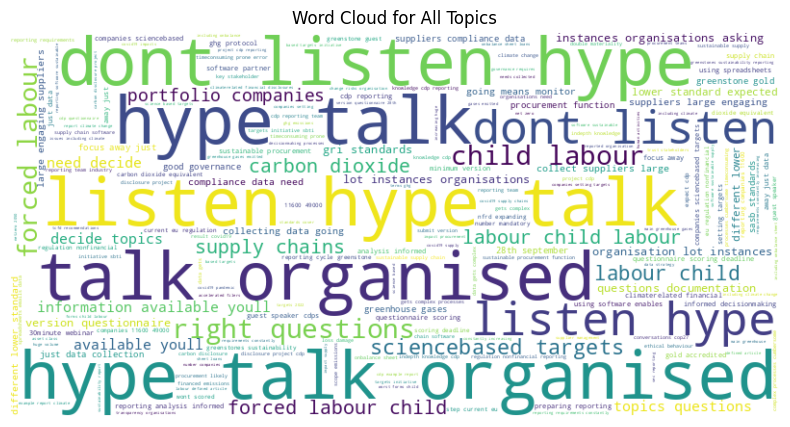

In [ ]:
all_topics=topic_model_tfidf.get_topics()
# Aggregate words and weights across all topics
word_weights = defaultdict(float)
for topic, words in all_topics.items():
    if topic != -1:  # Skip the outlier topic (-1)
        for word, weight in words:
            word_weights[word] += weight

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for All Topics")
plt.show()

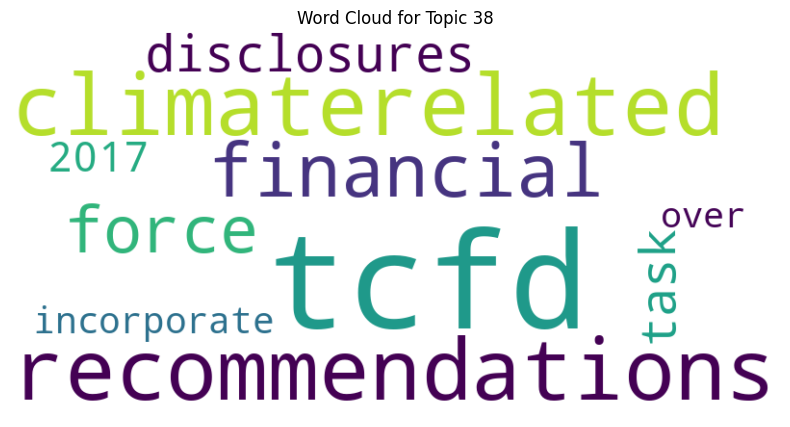

In [ ]:
from bertopic import BERTopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assume BERTopic model is already trained
# Example: topics, probs = topic_model.fit_transform(sentences)

# Choose a specific topic to visualize
topic_number = 38 # Replace with your desired topic number

# Get the top words for the chosen topic
words = topic_model.get_topic(topic_number)  # List of (word, weight) tuples

# Prepare data for the word cloud
word_weights = {word: weight for word, weight in words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for Topic {topic_number}")
plt.show()
